# Import package

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

# Configuration

In [128]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Load data

In [129]:
listings_df = pd.read_csv('D:\\MyProjects\\01_Airbnb\\Data\\seattle_listings.csv', sep=',')
listings_df.shape   # (3818, 92)

(3818, 92)

# Data structure and content

#### View content: Looking at first 5 rows

In [130]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### View structure: Data type of all features

In [131]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [132]:
# How many listings are in the data
print("Num of listings: ", listings_df.id.count())
print("Num of rows: ", listings_df.shape[0])

Num of listings:  3818
Num of rows:  3818


   => This shows each row represents a unique listing

### Summary

   * The listings data has 92 columns

   * There are many features in the dataset. At the first glance of the dataset, we've seen that it contains many irrelevant and redundant columns that we don't want to use in our predictive model. Colums such as “host_pircture_url” and “host_name” will not make any effects on our predictions on “price”. However, columns such as “bedrooms” and “room_type” are very likely to influence the prices in our common sense. We’ll judge whether or not they should be included in our final features by both our common senese and some experimental results.

   * Columns "price", "extra_people", "cleaning_fee" : They are stored as object, therefore need to convert to numerical values

   * In general, there are 4 types of data of features: numeric features, categorical features, text features, datetime features

   * Type of columns according to the meaning info for each listing: House information, Location information, Review information

# Descriptive statistics

In [133]:
# Summary statistics on each numeric column
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


### Summary


# Check missing data

In [134]:
def Check_Missing_Data(df):    
    # count all missing values of each column
    total = df.isnull().sum().sort_values(ascending=False)
    # calculate percentage of null values for each column
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

Check_Missing_Data(listings_df)

,Total,Percent
license,3818,1.000000
square_feet,3721,0.974594
monthly_price,2301,0.602672
security_deposit,1952,0.511262
weekly_price,1809,0.473808
notes,1606,0.420639
neighborhood_overview,1032,0.270299
cleaning_fee,1030,0.269775
transit,934,0.244631
host_about,859,0.224987


   => Most of the columns have between 0-30% of null ratio.

# Target variable analysis

#### View the first 5 row

In [135]:
# View the first 5 row
listings_df['price'].head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

#### Convert price from string to float

In [136]:
# Convert price from string to float
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
listings_df['price'].head()

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

#### Check num or rows having price = 0 and <> 0

In [137]:
# Check num or rows having price = 0 and <> 0
print(listings_df[listings_df.price  == 0].shape)
print(listings_df[listings_df.price  > 0].shape)

(0, 92)
(3818, 92)


#### Visualization distribution of Price 

In [138]:
def NumData_Distribution1(df, title):     
    plt.figure(figsize=(16, 5))
    plt.subplot(121)
    sns.boxplot(x=df)
    plt.title(title)    
    plt.subplot(122)
    sns.distplot(df, hist = True, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
    plt.title(title)
    plt.show()

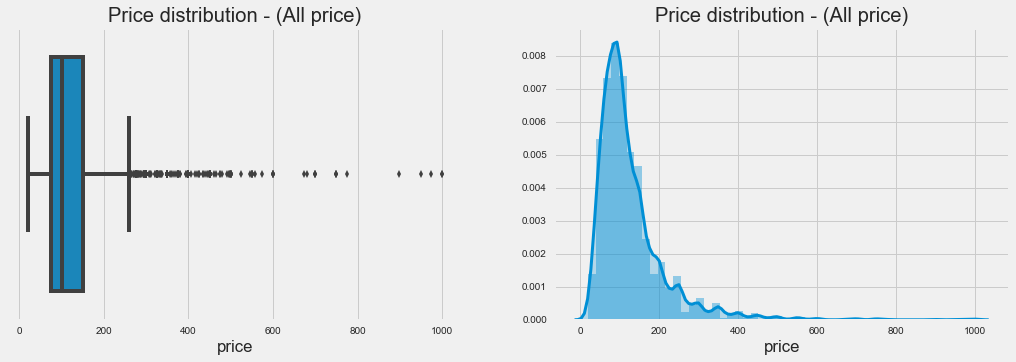

In [139]:
# Price distribution
NumData_Distribution1(listings_df['price'],'Price distribution - (All price)')

   => Figure shows the price distribution among the whole dataset, from which we can see that most prices lied in 
    the range [0, 200]

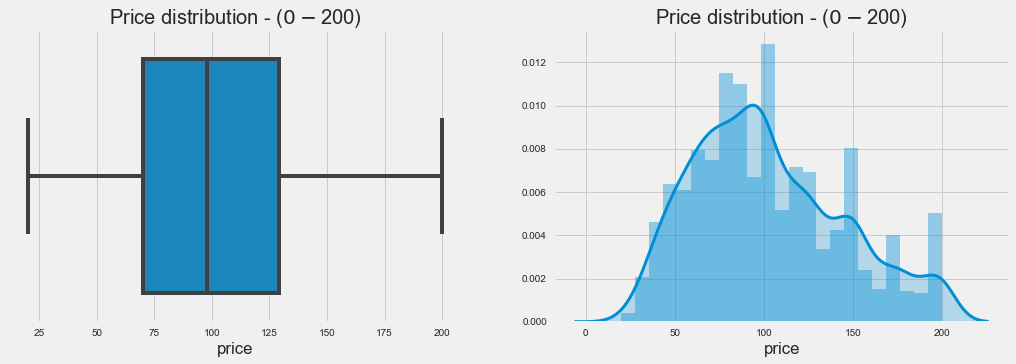

In [140]:
NumData_Distribution1(listings_df.price[listings_df.price<= 200],'Price distribution - ($0 - $200)')

   => The second one shows the distribution within the range [0,200], which shows that people seem to have a tendency to fix the price at the number divisable by 10. To verify this assumption, we can plot the disstribution in a smaller range [0,100]

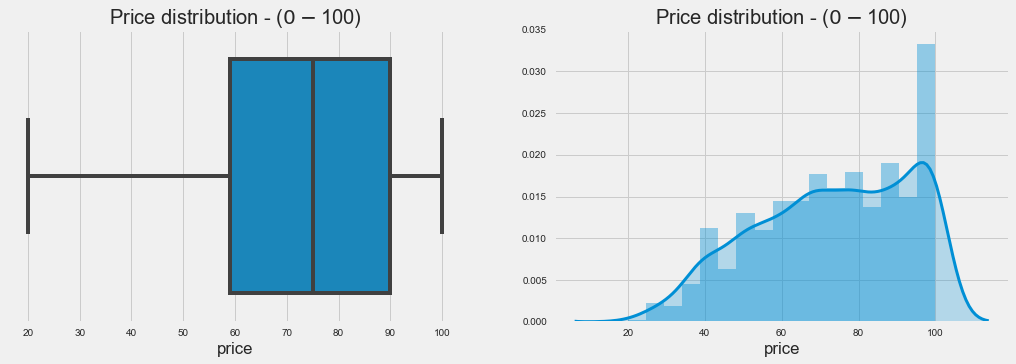

In [141]:
NumData_Distribution1(listings_df.price[listings_df.price<= 100],'Price distribution - ($0 - $100)')

   => We can clear see that every “tens” has very high frequency in the data and it means our hypothesis is plausible

#### Visualize Distribution of Log price

Skewness: 0.372414
Kurtosis: 0.371624


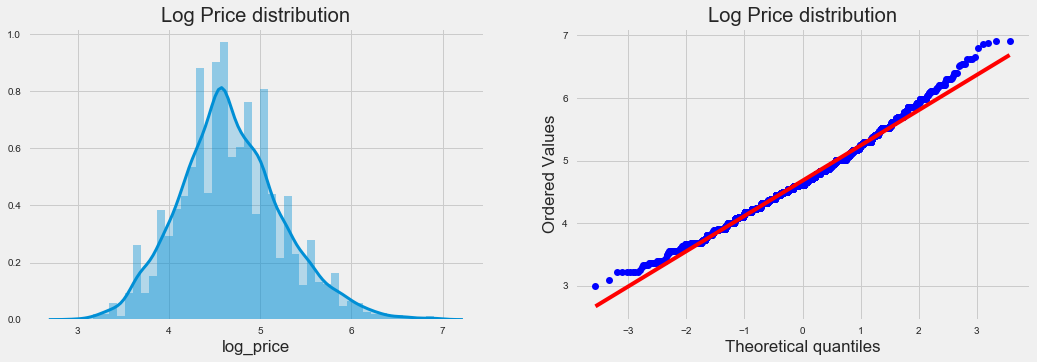

In [142]:
# Log Price distribution
def NormalDistribution_Check(df, title):
    plt.figure(figsize=(16, 5)) 
    plt.subplot(121)    
    sns.distplot(df, hist = True, kde = True,kde_kws = {'shade': True, 'linewidth': 3})
    plt.title(title)    
    plt.subplot(122)
    stats.probplot(df, plot=plt)
    plt.title(title)
    #skewness and kurtosis
    print("Skewness: %f" % df.skew())
    print("Kurtosis: %f" % df.kurt())
    plt.show()

listings_df['log_price']  = listings_df['price'].apply(lambda x: math.log(x))
NormalDistribution_Check(listings_df['log_price'],'Log Price distribution')

   => Log transformation of Price is minimally skewed (0.37) and showing insignificant kurtosis (0.37 < 1). This passes the spot check for normal distribution (bell-shaped, symmetrical about the center). Likewise, the probability plot appears linear which means the log price has approximately normal distribution

# Numerical features

### Common Functions

In [143]:
def Feature_Frequency(df, feature, name, rotation=0, size=(8,6)):
    feature_frequency = pd.DataFrame(df.groupby(feature).id.count())
    feature_frequency.columns = ['Num_Of_Listings']
    feature_frequency = feature_frequency.reset_index()
    if(rotation == 1):
        feature_frequency = feature_frequency.sort_values('Num_Of_Listings', ascending = True)
        feature_frequency.plot(kind='barh', x = feature, y = 'Num_Of_Listings', title = name + ' ' + feature + ' frequency', legend = False, figsize=size)
        plt.ylabel(feature)
        plt.xlabel('Frequency')
    else:
        feature_frequency = feature_frequency.sort_values('Num_Of_Listings', ascending = False)
        feature_frequency.plot(kind='bar', x = feature, y = 'Num_Of_Listings', title = name + ' ' + feature + ' frequency', legend = False, figsize=size)
        plt.xlabel(feature)
        plt.ylabel('Frequency')        
    return feature_frequency
    
def Feature_Price(df, feature, name, rotation=0, size=(8,6)):
    feature_price = df.groupby(feature).price.mean()
    feature_price = feature_price.reset_index()
    feature_price = feature_price.rename(columns={'price':'average_Price'})    
    if(rotation == 1):
        feature_price = feature_price.sort_values('average_Price',ascending=True)
        feature_price.plot(kind='barh', x=feature, y='average_Price', title = name + ' ' + feature + ' average price', legend = False, figsize=size)
        plt.ylabel(feature)
        plt.xlabel('Average Price') 
        return feature_price
    else:
        feature_price = feature_price.sort_values('average_Price',ascending=False)
        feature_price.plot(kind='bar', x=feature, y='average_Price', title = name + ' ' + feature + ' average price', legend = False, figsize=size)
        plt.xlabel(feature)
        plt.ylabel('Average Price') 
        return feature_price  

In [144]:
# Distribution plot
def Distribution_Plot(df,nbin=30 ,size=(22,14)):
    fig = plt.figure(figsize=size)
    layout = (2, 3)
    ax1 = plt.subplot2grid(layout, (0, 0))
    ax1.hist(df, bins = nbin)
    ax2 = plt.subplot2grid(layout, (0, 1))
    sns.distplot(df,kde=False,fit=stats.gamma,ax=ax2);
    ax3 = plt.subplot2grid(layout, (0, 2))
    sns.kdeplot(df, shade=True, ax=ax3);
    ax4 = plt.subplot2grid(layout, (1, 0))
    sm.qqplot(df, line='s', ax=ax4)
    ax5 = plt.subplot2grid(layout, (1, 1), colspan=2)
    sns.boxplot(x=df,ax=ax5)
    plt.tight_layout()

### accommodates

In [145]:
accommodates_df = listings_df[['accommodates','price','id']]
accommodates_df.head()

,accommodates,price,id
0,4,85.0,241032
1,4,150.0,953595
2,11,975.0,3308979
3,3,100.0,7421966
4,6,450.0,278830


In [146]:
# descriptive statistics
accommodates_df['accommodates'].describe()

count    3818.000000
mean        3.349398
std         1.977599
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: accommodates, dtype: float64

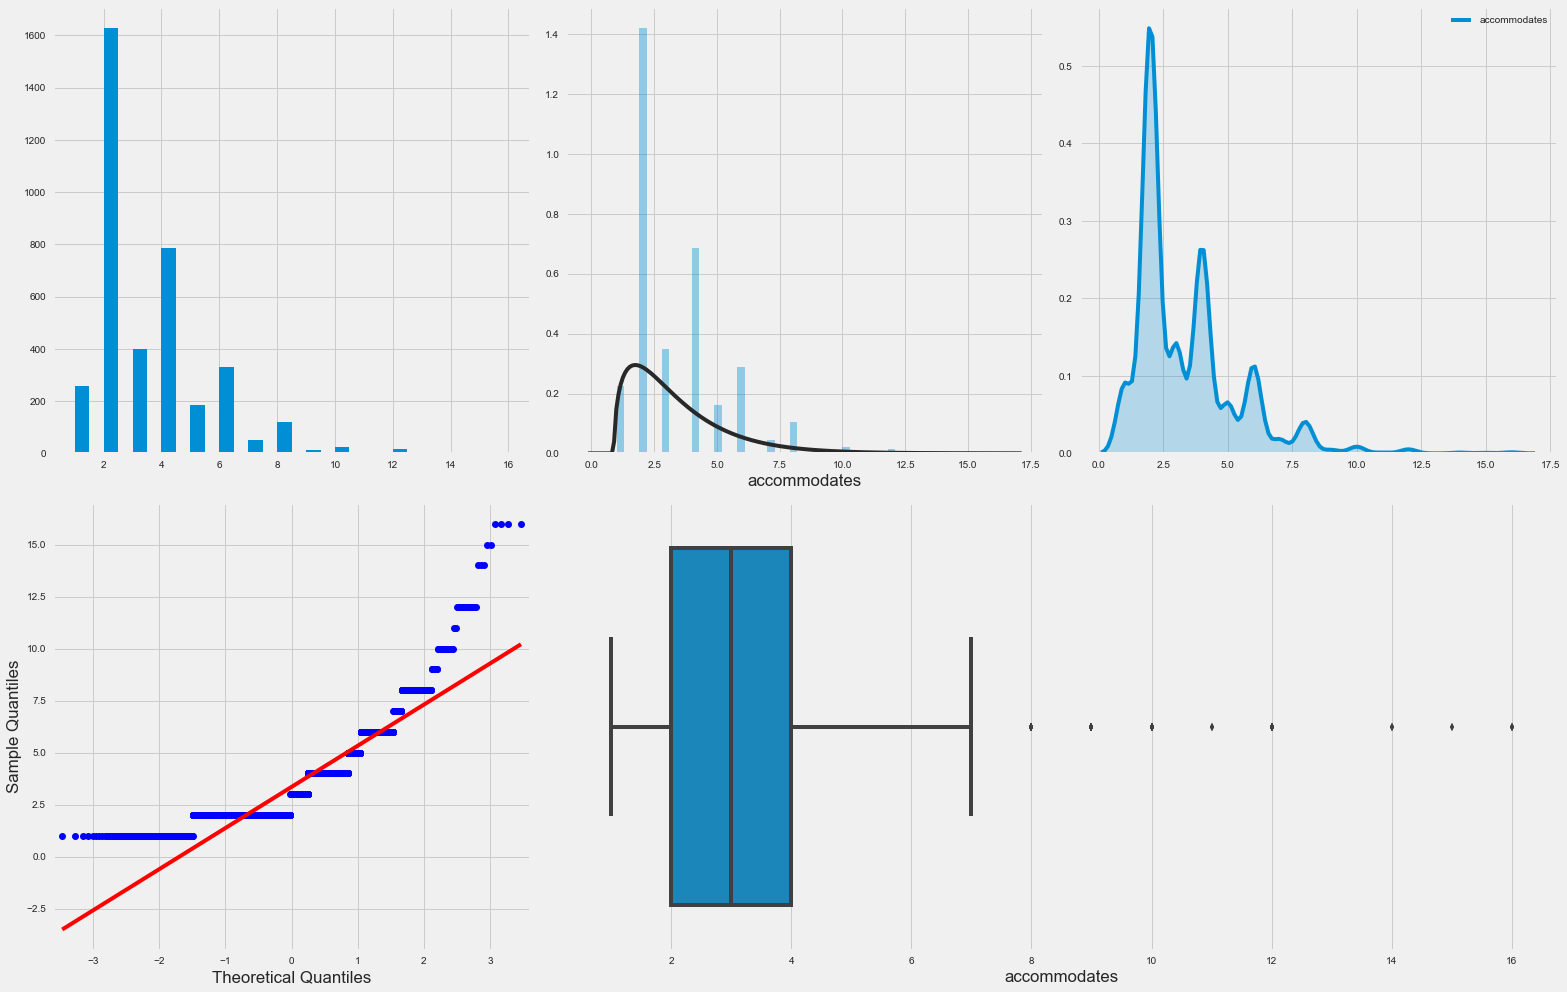

In [147]:
# Distribution plot
Distribution_Plot(accommodates_df['accommodates'])

,accommodates,Num_Of_Listings
13,15,2
10,11,3
12,14,3
14,16,4
8,9,13
11,12,15
9,10,25
6,7,52
7,8,119
4,5,184


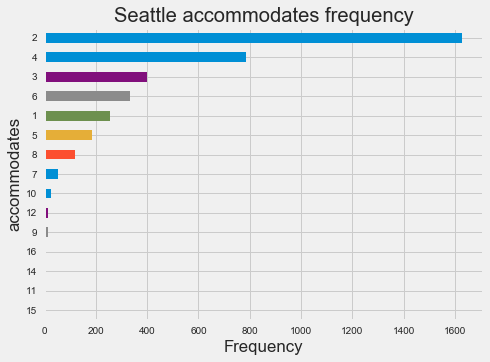

In [148]:
# Accommodates frequency
Feature_Frequency(accommodates_df,'accommodates','Seattle',1,(7,5))

,accommodates,average_Price
0,1,58.375000
1,2,91.296865
2,3,111.600503
3,4,140.273885
4,5,181.804348
5,6,198.572289
6,7,220.788462
13,15,286.000000
7,8,295.478992
11,12,345.666667


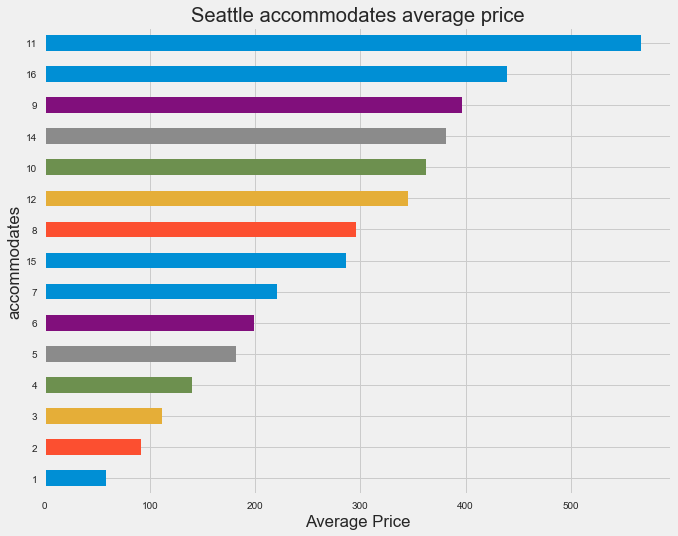

In [149]:
# Accommodates Average price
Feature_Price(accommodates_df,'accommodates','Seattle',1,(10,8))

### bathrooms

In [150]:
bathrooms_df = listings_df[['bathrooms','price','id']]
bathrooms_df.head()

,bathrooms,price,id
0,1.0,85.0,241032
1,1.0,150.0,953595
2,4.5,975.0,3308979
3,1.0,100.0,7421966
4,2.0,450.0,278830


In [151]:
bathrooms_df.bathrooms.isnull().sum()

16

In [152]:
bathrooms_df.bathrooms.value_counts()

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
0.0       8
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [153]:
bathrooms_df.bathrooms.describe()

count    3802.000000
mean        1.259469
std         0.590369
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: bathrooms, dtype: float64

In [154]:
bathrooms_df['bathrooms'] = bathrooms_df['bathrooms'].fillna(bathrooms_df['bathrooms'].mode()[0])

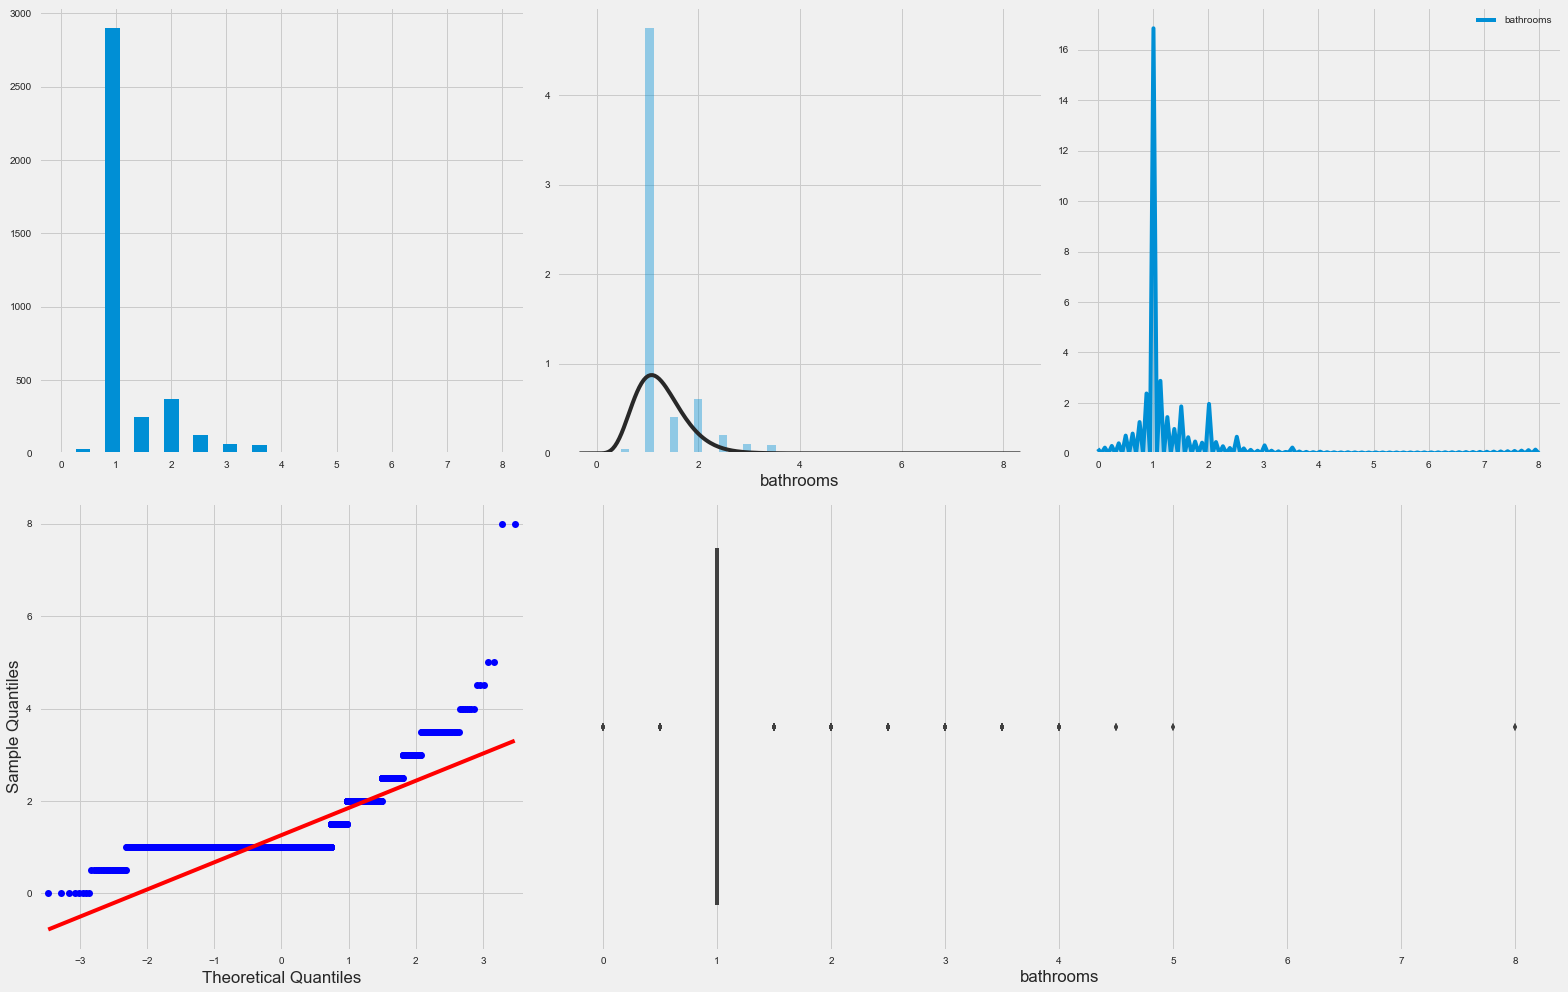

In [155]:
Distribution_Plot(bathrooms_df['bathrooms'])

,bathrooms,Num_Of_Listings
2,1.0,2898
4,2.0,373
3,1.5,248
5,2.5,124
6,3.0,64
7,3.5,57
1,0.5,31
0,0.0,8
8,4.0,8
9,4.5,3


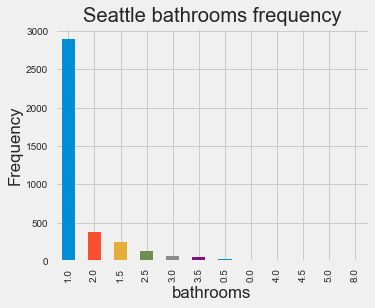

In [156]:
Feature_Frequency(bathrooms_df,'bathrooms','Seattle',0,(5,4))

,bathrooms,average_Price
11,8.0,70.000000
1,0.5,73.354839
0,0.0,80.375000
2,1.0,106.749137
3,1.5,130.060484
10,5.0,135.000000
4,2.0,191.737265
5,2.5,256.677419
6,3.0,275.453125
7,3.5,306.964912


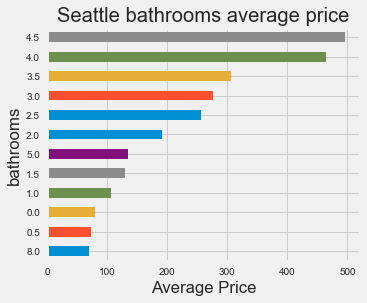

In [157]:
Feature_Price(bathrooms_df,'bathrooms','Seattle',1,(5,4))

### bedrooms

In [158]:
bedrooms_df = listings_df[['bedrooms','price','id']]
bedrooms_df.head()

,bedrooms,price,id
0,1.0,85.0,241032
1,1.0,150.0,953595
2,5.0,975.0,3308979
3,0.0,100.0,7421966
4,3.0,450.0,278830


In [159]:
bedrooms_df['bedrooms'].describe()

count    3812.000000
mean        1.307712
std         0.883395
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: bedrooms, dtype: float64

In [160]:
bedrooms_df['bedrooms'].isnull().sum()

6

In [161]:
bedrooms_df['bedrooms'].value_counts()

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

In [162]:
bedrooms_df['bedrooms'] = bedrooms_df['bedrooms'].fillna(bedrooms_df['bedrooms'].mode()[0])

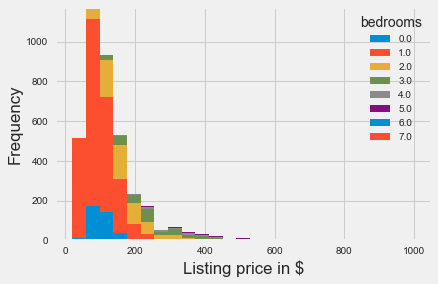

In [163]:
bedrooms_df.loc[bedrooms_df.price <= 1000,:].pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')
plt.show()

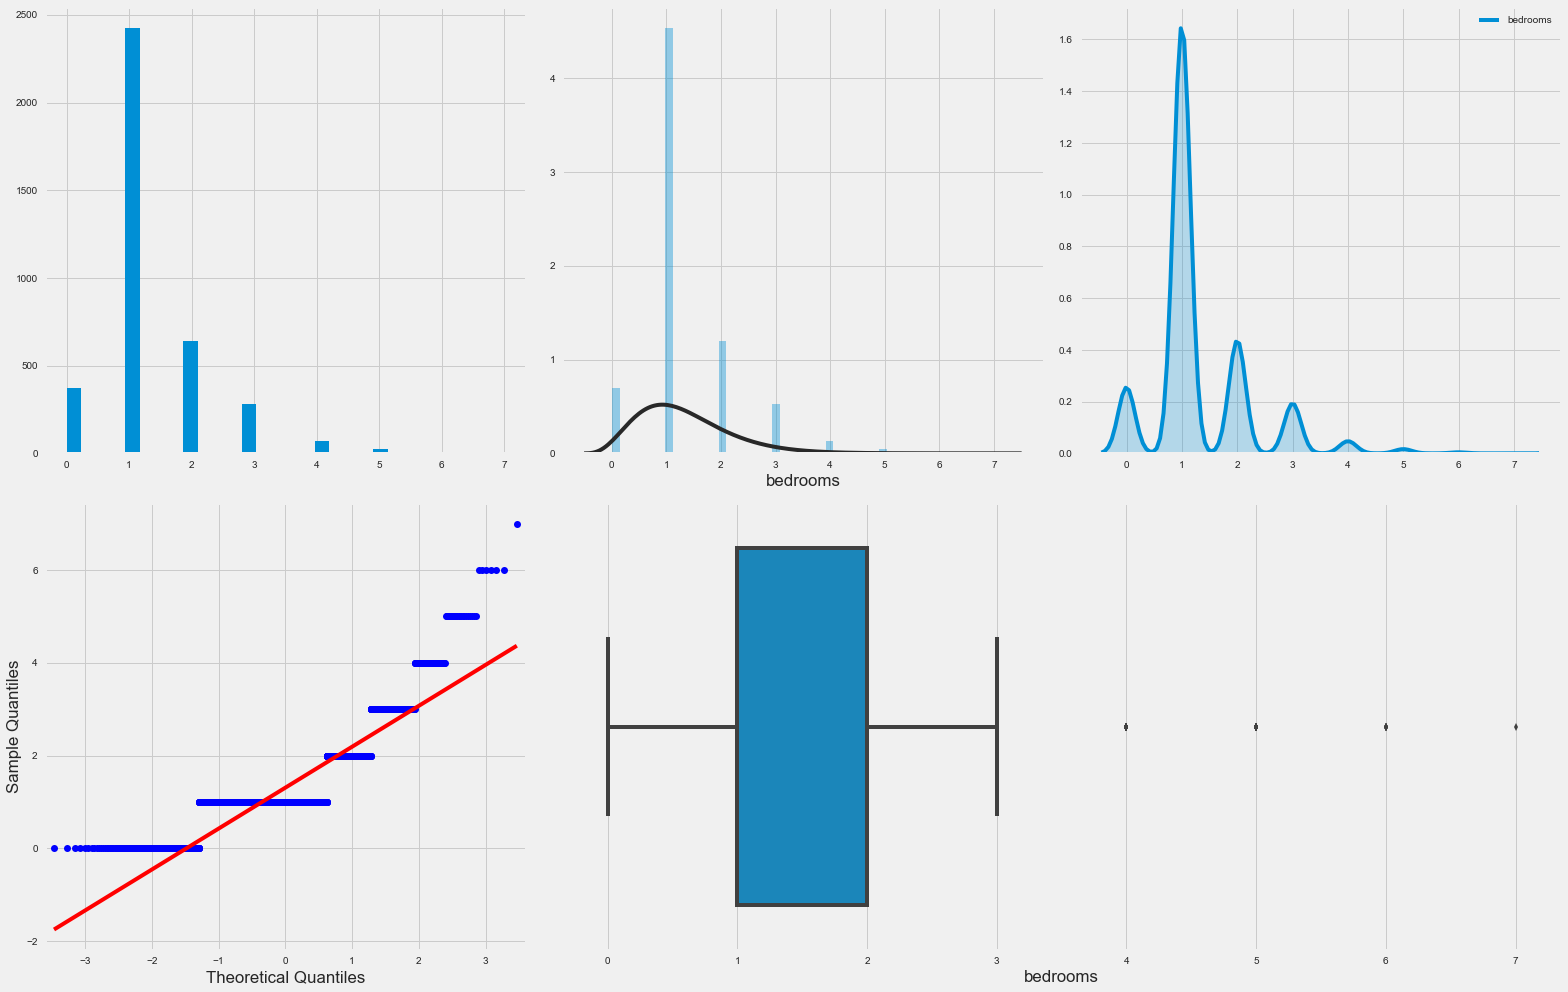

In [164]:
Distribution_Plot(bedrooms_df['bedrooms'])

,bedrooms,Num_Of_Listings
1,1.0,2423
2,2.0,640
0,0.0,372
3,3.0,283
4,4.0,69
5,5.0,24
6,6.0,6
7,7.0,1


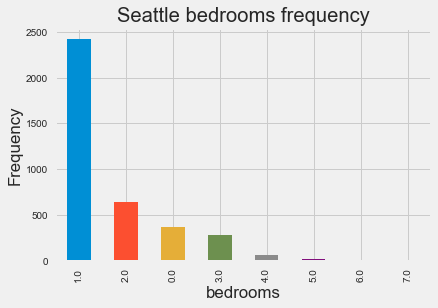

In [165]:
Feature_Frequency(bedrooms_df,'bedrooms','Seattle',0,(6,4))

,bedrooms,average_Price
6,6.0,578.166667
5,5.0,441.000000
7,7.0,375.000000
4,4.0,313.695652
3,3.0,249.530035
2,2.0,174.062500
0,0.0,103.548387
1,1.0,95.750310


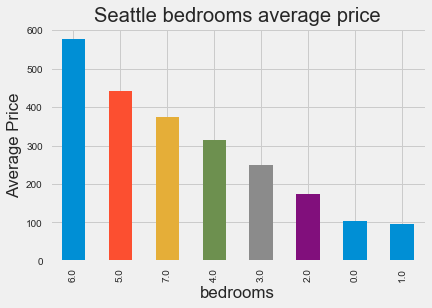

In [166]:
Feature_Price(bedrooms_df,'bedrooms','Seattle',0,(6,4))

### beds

In [167]:
listings_df['beds'] =listings_df['beds'].fillna(listings_df['beds'].mode()[0])

### cleaning_fee

In [168]:
# View data
listings_df['cleaning_fee'].head()

0        NaN
1     $40.00
2    $300.00
3        NaN
4    $125.00
Name: cleaning_fee, dtype: object

In [169]:
# convert from string to float
listings_df['cleaning_fee'] = (listings_df['cleaning_fee'].str.replace(r'[^-+\d.]', '').astype(float))
# listings_df['cleaning_fee'] = df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listings_df['cleaning_fee'].head()

0      NaN
1     40.0
2    300.0
3      NaN
4    125.0
Name: cleaning_fee, dtype: float64

In [170]:
cleaning_fee_df = listings_df[['cleaning_fee','price','id']]

In [171]:
cleaning_fee_df['cleaning_fee'].describe()

count    2788.000000
mean       61.710904
std        48.830341
min         5.000000
25%        25.000000
50%        50.000000
75%        83.000000
max       300.000000
Name: cleaning_fee, dtype: float64

In [172]:
cleaning_fee_df.isnull().sum()

cleaning_fee    1030
price              0
id                 0
dtype: int64

In [173]:
cleaning_fee_df = cleaning_fee_df.dropna()

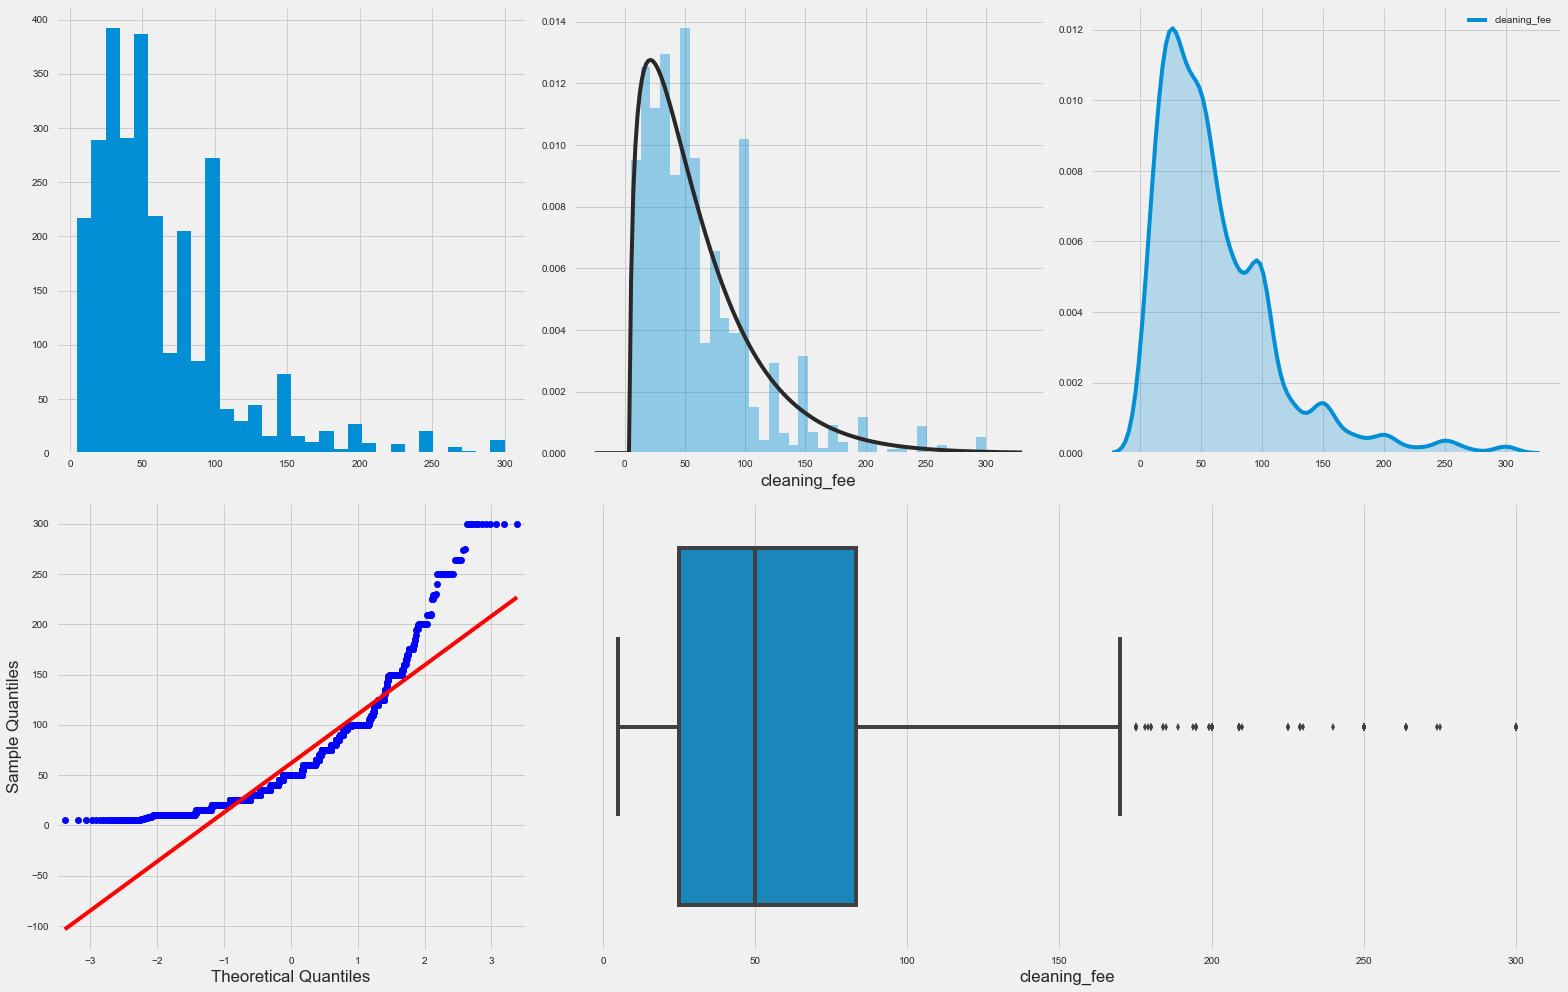

In [174]:
Distribution_Plot(cleaning_fee_df['cleaning_fee'])

Text(0.5,1,'No. of cleaning_fee vs price')

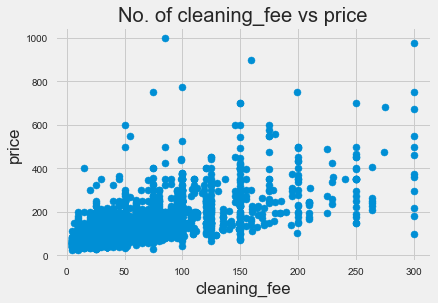

In [175]:
plt.scatter(cleaning_fee_df['cleaning_fee'],cleaning_fee_df['price'])
plt.ylabel('price')
plt.xlabel('cleaning_fee')
plt.title('No. of cleaning_fee vs price')

### extra_people

In [176]:
# View data
listings_df['extra_people'].head()

0     $5.00
1     $0.00
2    $25.00
3     $0.00
4    $15.00
Name: extra_people, dtype: object

In [177]:
# convert from string to float
listings_df['extra_people'] = (listings_df['extra_people'].str.replace(r'[^-+\d.]', '').astype(float))
# listings_df['extra_people'] = df['extra_people'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'].head()

0     5.0
1     0.0
2    25.0
3     0.0
4    15.0
Name: extra_people, dtype: float64

### host_listings_count

In [178]:
#fill missing values with mean value for host_listings_count
listings_df['host_listings_count'].fillna(listings_df['host_listings_count'].mean(), inplace = True)


### host_response_rate

In [179]:
#convert host_response_rate into number and fill in missing values, drop the original column


### reviews

Text(0.5,1,'No. of reviews vs price')

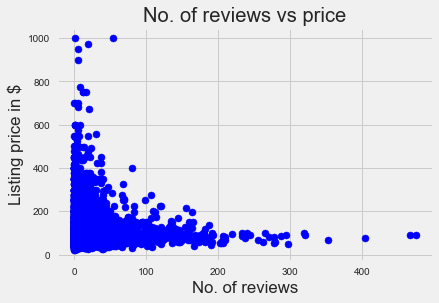

In [180]:
# number_of_reviews
number_of_reviews_df = listings_df[['number_of_reviews','price','id']]
number_of_reviews_df.head()

plt.scatter(number_of_reviews_df['number_of_reviews'],number_of_reviews_df['price'], color='b')
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')

### maximum_night

#### View content and descriptive statistics

In [181]:
listings_df['maximum_nights'].head()

0     365
1      90
2      30
3    1125
4    1125
Name: maximum_nights, dtype: int64

In [182]:
listings_df['maximum_nights'].describe().reset_index()

,index,maximum_nights
0,count,3818.000000
1,mean,780.447617
2,std,1683.589007
3,min,1.000000
4,25%,60.000000
5,50%,1125.000000
6,75%,1125.000000
7,max,100000.000000


#### Visualize distribution

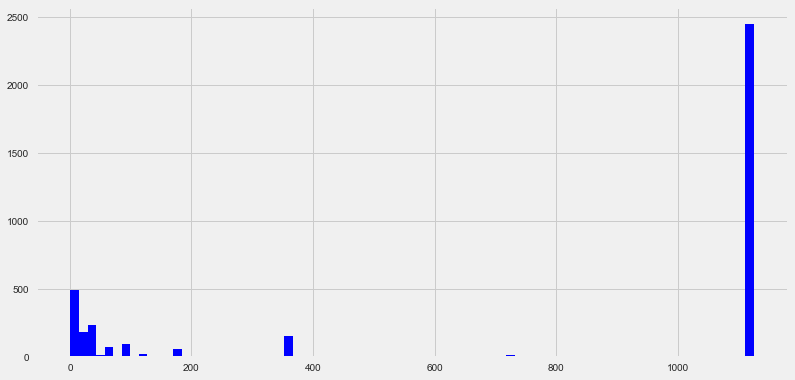

In [183]:
plt.figure(figsize=(12, 6))
plt.hist(listings_df[listings_df['maximum_nights'] <= 1500]['maximum_nights'].values, bins=80, color='b')
plt.show()

   => There are 2 segments, one is around 1 week for short-term and the other is about 3 years for long-term rent

### review_scores_rating

#### View content and descriptive statistics

In [184]:
review_scores_rating_df = listings_df[['review_scores_rating','price']]
review_scores_rating_df.head()

,review_scores_rating,price
0,95.0,85.0
1,96.0,150.0
2,97.0,975.0
3,NaN,100.0
4,92.0,450.0


In [185]:
review_scores_rating_df['review_scores_rating'].describe().reset_index()

,index,review_scores_rating
0,count,3171.000000
1,mean,94.539262
2,std,6.606083
3,min,20.000000
4,25%,93.000000
5,50%,96.000000
6,75%,99.000000
7,max,100.000000


#### Remove rows missing data

In [186]:
review_scores_rating_df = review_scores_rating_df.dropna()
review_scores_rating_df.head()

,review_scores_rating,price
0,95.0,85.0
1,96.0,150.0
2,97.0,975.0
4,92.0,450.0
5,95.0,120.0


#### Visualize distribution

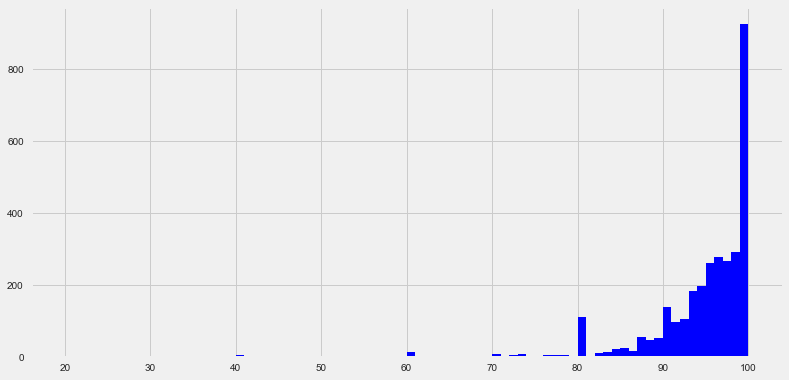

In [187]:
plt.figure(figsize=(12, 6))
plt.hist(review_scores_rating_df['review_scores_rating'].values, bins=80, color='b')
plt.show()

   => This is very right skewed distribution. The 75% or more values are 90 points. And the most common thing is 100 points. The low score listings are minolity.

### Summary of Numeric features 
   * The review_scores_rating has right skewed distribution, and almost values are over 90 points.
   * The price has long tail distribution, almost values are around 100$ but some values are much higher than other values. 
   * The maximum_nights has very special distribution. Their are two segments, one is about 3 years, the other is around 1week.

# Categorical features

### Select all categorical features in the dataset

In [188]:
categorical = ['object']
categoricaldata = listings_df.select_dtypes(include=categorical)
categoricaldata.shape     

(3818, 59)

### List unique values and num of rows

In [189]:
categoricaldata['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

### Check missing data

In [191]:
Check_Missing_Data(categoricaldata)

,Total,Percent
monthly_price,2301,0.602672
security_deposit,1952,0.511262
weekly_price,1809,0.473808
notes,1606,0.420639
neighborhood_overview,1032,0.270299
transit,934,0.244631
host_about,859,0.224987
host_acceptance_rate,773,0.202462
last_review,627,0.164222
first_review,627,0.164222


### cancellation_policy

In [192]:
listings_df['cancellation_policy'].unique()
cancellation_policy_df = listings_df[['cancellation_policy','price','id']]

### host_id + host_name

In [193]:
hostname_df = listings_df[['host_id','host_name','price']]
hostname_df.head()

,host_id,host_name,price
0,956883,Maija,85.0
1,5177328,Andrea,150.0
2,16708587,Jill,975.0
3,9851441,Emily,100.0
4,1452570,Emily,450.0


### instant_bookable

In [194]:
instant_bookable_df = listings_df[['instant_bookable','price','id']]
listings_df['instant_bookable'].unique()

array(['f', 't'], dtype=object)

### property_type

In [195]:
propertytype_df = listings_df[['property_type','price','id']]

,property_type,Num_Of_Listings
9,House,1733
0,Apartment,1708
13,Townhouse,118
7,Condominium,91
10,Loft,40
1,Bed & Breakfast,37
11,Other,22
4,Cabin,21
3,Bungalow,13
5,Camper/RV,13


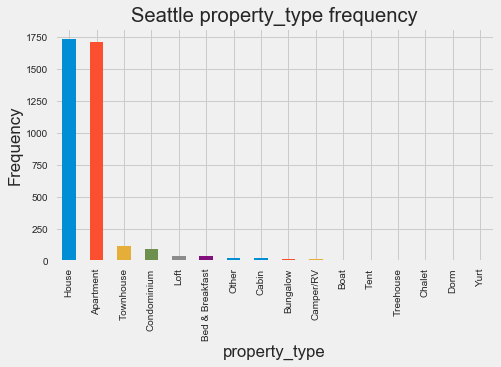

In [199]:
Feature_Frequency(propertytype_df,'property_type','Seattle',0,(7,4))

,property_type,average_Price
8,Dorm,39.500000
12,Tent,54.000000
11,Other,94.681818
6,Chalet,98.500000
15,Yurt,100.000000
14,Treehouse,101.000000
4,Cabin,104.666667
1,Bed & Breakfast,112.054054
3,Bungalow,115.615385
5,Camper/RV,120.461538


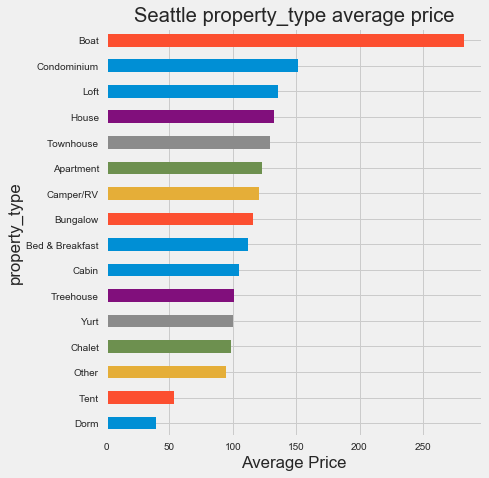

In [202]:
Feature_Price(propertytype_df,'property_type','Seattle',1,(6,7))

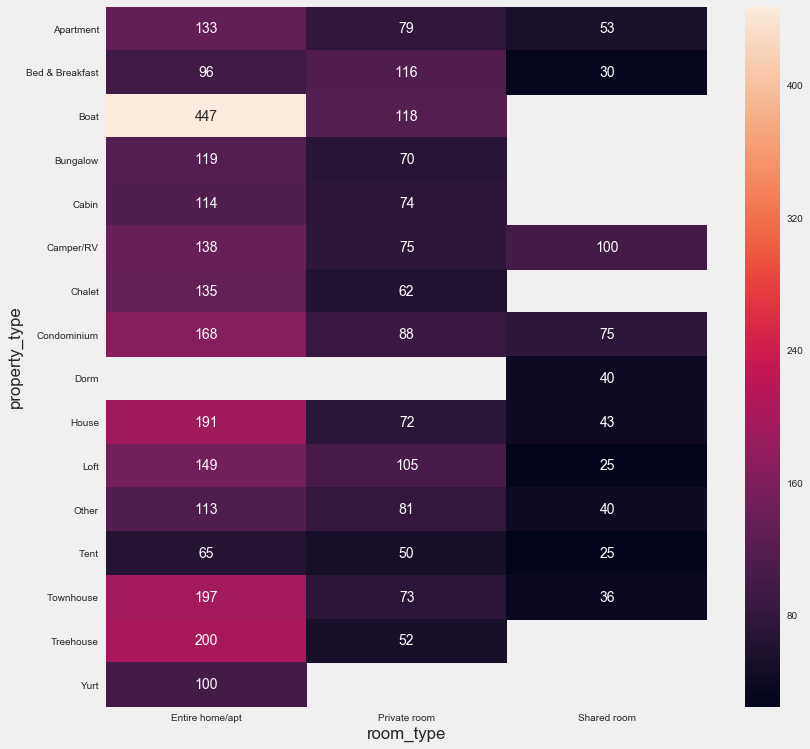

In [203]:
#Plotting the same on a heatMap
listings_df.groupby(['property_type', 'room_type']).price.mean().unstack()
plt.figure(figsize=(12,12))
sns.heatmap(listings_df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

### room_type

In [204]:
roomtype_df = listings_df[['room_type','price','id']]

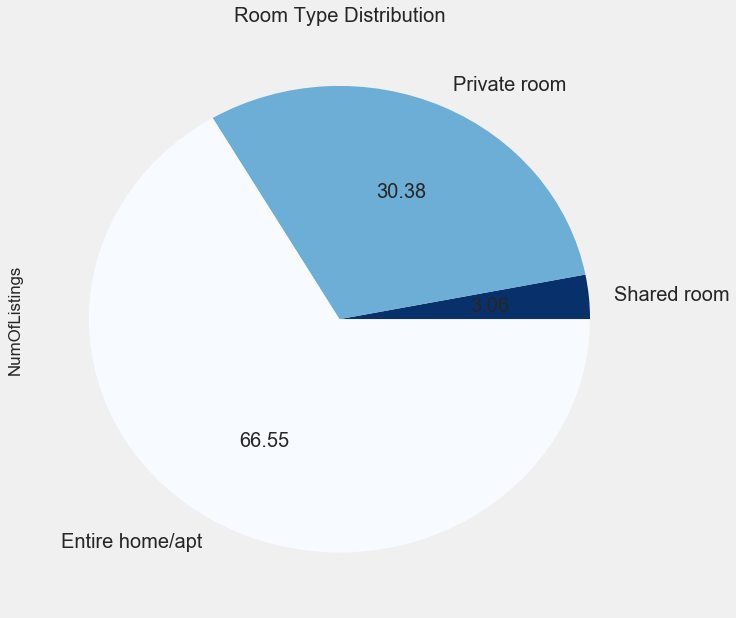

In [205]:
roomtype = pd.DataFrame(listings_df.groupby('room_type').id.count().sort_values())
roomtype.columns = ['NumOfListings']
roomtype.plot.pie(y = 'NumOfListings',
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')
plt.show()

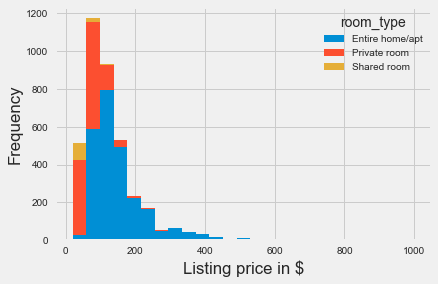

In [206]:
roomtype_df.loc[roomtype_df.price <= 1000,:].pivot(columns = 'room_type',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')
plt.show()

### zipcode

In [207]:
zipcode_df = listings_df[['zipcode','price']]
zipcode_df.head()

,zipcode,price
0,98119,85.0
1,98119,150.0
2,98119,975.0
3,98119,100.0
4,98119,450.0


In [209]:
listings_df = listings_df[pd.notnull(listings_df['zipcode'])]
listings_df = listings_df[listings_df['zipcode']!= ' ']

In [210]:
# for index,row in listings_df.iterrows():
#    zipcode = row['zipcode']
#    zipcode = nltk.word_tokenize(zipcode)[0].upper()[0:3]
#    listings_df.loc[index,'new_zipcode'] = zipcode

# Text features

In [224]:
def Text_Preprocessing(df,field_name):
    words_bag = ''
    for index,row in df.iterrows():
        # Convert ',' to ' ' for each row
        p = re.sub('[^a-zA-Z]+',' ', row[field_name])
        words_bag+=p
    # split a paragraph to list of word
    words_data=nltk.word_tokenize(words_bag)
    # only keep Enlisht words
    filtered_words_data=[word for word in words_data if word not in stopwords.words('english')] 
    wnl = nltk.WordNetLemmatizer() 
    words_data=[wnl.lemmatize(data) for data in filtered_words_data]
    # join all words together
    processed_words=' '.join(words_data)
    
    return processed_words

def Text_Processing2(df,field_name):
    words=''
    for index,row in df.iterrows():
        words += row[field_name]
    string_punctuation = string.punctuation
    ignoreChar=['\r','\n','',' ',"'s"]
    nums=['0','1','2','3','4','5','6','7','8','9']
    words_data=nltk.word_tokenize(words)
    words_only = [l.lower() for l in words_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
    filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
    wnl = nltk.WordNetLemmatizer() 
    final_data=[wnl.lemmatize(data) for data in filtered_data]
    final_words=' '.join(final_data)    
    return final_words


def Wordcloud_Visualization(txt):
    wordcloud = WordCloud(width = 500, height = 400).generate(txt)
    plt.figure(figsize=(7,6))
    plt.imshow(wordcloud)
    plt.axis("off")    


def count_words(df):
    word_list = []
    for element in df:
        # element = element[1:-1]
        x = element.split()
        word_list.append(len(x))  
    
    return word_list

### amenities

In [211]:
col = listings_df.amenities
col[0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [214]:
t = col[0]
t = t.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
t

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer']

In [215]:
values_dict = {}
for value in t:
    if value in values_dict:
        values_dict[value] = values_dict[value] + 1
    else:
        values_dict[value] = 0
values_dict        

{'TV': 0,
 'Cable TV': 0,
 'Internet': 0,
 'Wireless Internet': 0,
 'Air Conditioning': 0,
 'Kitchen': 0,
 'Heating': 0,
 'Family/Kid Friendly': 0,
 'Washer': 0,
 'Dryer': 0}

In [219]:
values_dict.items()

dict_items([('TV', 0), ('Cable TV', 0), ('Internet', 0), ('Wireless Internet', 0), ('Air Conditioning', 0), ('Kitchen', 0), ('Heating', 0), ('Family/Kid Friendly', 0), ('Washer', 0), ('Dryer', 0)])

In [220]:
values_dict = {}
for unique_value in col.unique(): 
    for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
        if value in values_dict:
            values_dict[value] = values_dict[value] + 1
        else:
            values_dict[value] = 0            
values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
values_sorted

[('Wireless Internet', 3172),
 ('Heating', 3134),
 ('Kitchen', 2943),
 ('Smoke Detector', 2846),
 ('Essentials', 2786),
 ('Dryer', 2551),
 ('Washer', 2546),
 ('Internet', 2372),
 ('Shampoo', 2301),
 ('TV', 2208),
 ('Carbon Monoxide Detector', 2112),
 ('Free Parking on Premises', 1863),
 ('Fire Extinguisher', 1859),
 ('Family/Kid Friendly', 1666),
 ('First Aid Kit', 1465),
 ('Cable TV', 1233),
 ('Pets live on this property', 858),
 ('Indoor Fireplace', 786),
 ('Hangers', 735),
 ('Elevator in Building', 685),
 ('Hair Dryer', 664),
 ('Laptop Friendly Workspace', 658),
 ('Iron', 634),
 ('Safety Card', 626),
 ('Air Conditioning', 583),
 ('24-Hour Check-in', 520),
 ('Dog(s)', 497),
 ('Buzzer/Wireless Intercom', 467),
 ('Pets Allowed', 448),
 ('Cat(s)', 370),
 ('Gym', 369),
 ('Wheelchair Accessible', 270),
 ('Breakfast', 265),
 ('Hot Tub', 263),
 ('Suitable for Events', 184),
 ('Pool', 123),
 ('Lock on Bedroom Door', 94),
 ('Smoking Allowed', 77),
 ('Doorman', 69),
 ('Other pet(s)', 49),
 ('W

In [221]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

tmp_df =  listings_df[['id','amenities']]
# split into columns
for value in values_sorted[: 15]:
    tmp_df['amenities_' + value[0]] = tmp_df.apply(lambda row: get_val_from_list(row, 'amenities', value[0]),axis=1)
tmp_df.head()

,id,amenities,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,amenities_Carbon Monoxide Detector,amenities_Free Parking on Premises,amenities_Fire Extinguisher,amenities_Family/Kid Friendly,amenities_First Aid Kit
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [222]:
def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [223]:
tmp_df =  listings_df[['id','amenities']]
#split amenities into dummy columns and drop the original column
split_list_into_columns(tmp_df, 'amenities')

tmp_df.head()
tmp_df.columns.values

array(['id', 'amenities', 'amenities_Wireless Internet',
       'amenities_Heating', 'amenities_Kitchen',
       'amenities_Smoke Detector', 'amenities_Essentials',
       'amenities_Dryer', 'amenities_Washer', 'amenities_Internet',
       'amenities_Shampoo', 'amenities_TV'], dtype=object)

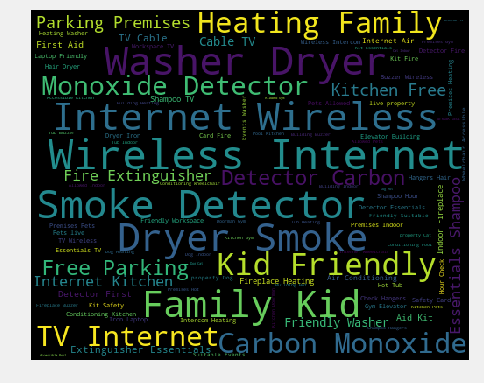

In [225]:
# Analyzing what amenities costs more ? top price
amenities_df = listings_df[['amenities','price','id']]
amenitiesDFTopper = amenities_df.sort_values('price',ascending=[0])
amenitiesDFtop = amenitiesDFTopper.head(500)
amenitiesDFtop.tail(20)
allemenities_words = Text_Preprocessing(amenitiesDFtop,'amenities')    
Wordcloud_Visualization(allemenities_words)

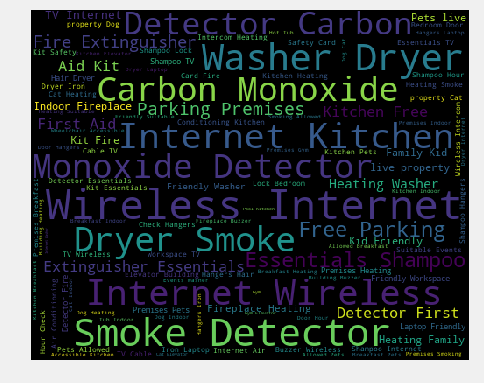

In [226]:
#Analyzing what amenities costs more ? bottom price
amenitiesDFbott =amenities_df.sort_values('price',ascending=[1])
amenitiesDFbottom=amenitiesDFbott.head(500)
amenitiesDFbottom.head(20)
allemenities_words = Text_Preprocessing(amenitiesDFbottom,'amenities')    
Wordcloud_Visualization(allemenities_words)

In [227]:
# splitting the amenities list to count the number of amenities
listings_df['num_of_amenities'] = count_words(listings_df.amenities)
listings_df['num_of_amenities'].head()
amenities_df = listings_df[['num_of_amenities','price','id']]

,num_of_amenities,Num_Of_Listings
27,29,1
26,27,1
25,26,3
24,25,5
23,24,9
22,23,12
21,22,22
20,21,23
1,2,43
0,1,49


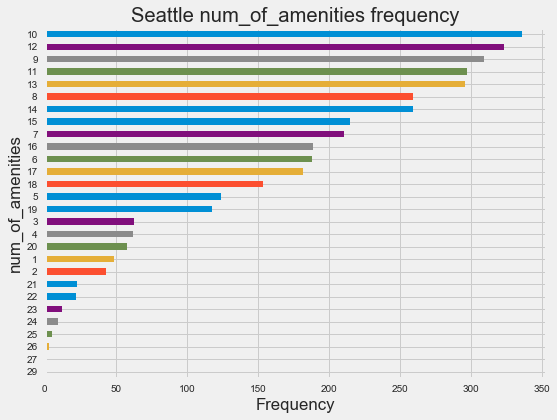

In [228]:
Feature_Frequency(amenities_df,'num_of_amenities','Seattle',1)

,num_of_amenities,average_Price
26,27,75.000000
24,25,87.800000
22,23,89.750000
1,2,90.279070
2,3,104.333333
5,6,107.292553
27,29,109.000000
4,5,109.354839
23,24,113.555556
7,8,117.424710


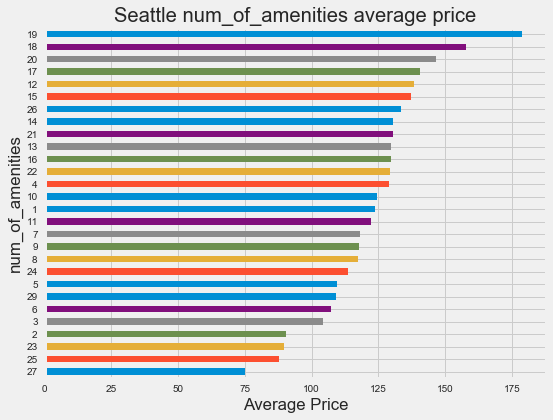

In [229]:
Feature_Price(amenities_df,'num_of_amenities','Seattle',1)

### description

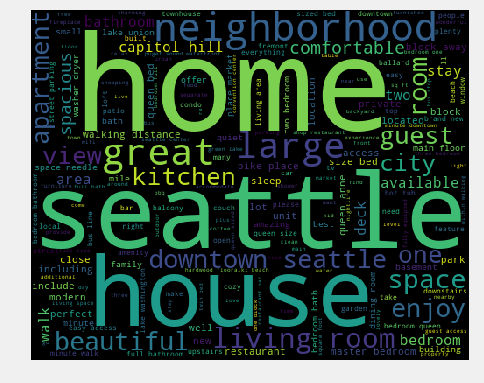

In [230]:
description_df = listings_df[['description','price']]
description_df = description_df[pd.notnull(description_df['description'])]
description_df = description_df[description_df['description']!=0]
description_df = description_df.sort_values('price',ascending=[0])
top_des_df = description_df.head(500)
top_des_df.tail(20)
final_words = Text_Processing2(top_des_df,'description')
Wordcloud_Visualization(final_words)

### neighborhood_overview

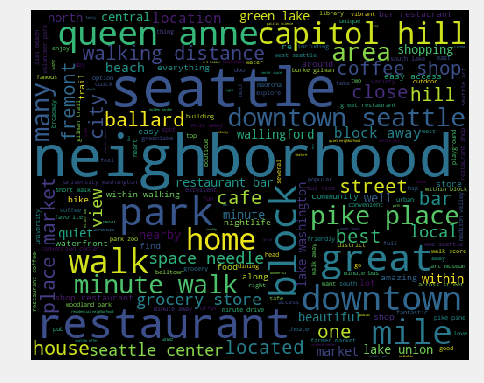

In [231]:
neighborhood_overview_df = listings_df[['neighborhood_overview','price']]
neighborhood_overview_df = neighborhood_overview_df[pd.notnull(neighborhood_overview_df['neighborhood_overview'])]
neighborhood_overview_df = neighborhood_overview_df.sort_values('price',ascending=[0])
top_nbh_df = neighborhood_overview_df.head(500)
final_words = Text_Processing2(top_nbh_df,'neighborhood_overview')
Wordcloud_Visualization(final_words)


### neighbourhood_group_cleansed

In [169]:
#get list of neighbourhoods
neighbourhoods = listings_df['neighbourhood_group_cleansed'].unique()
neighbourhoods

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill', 'Lake City'], dtype=object)

In [156]:
#merge datasets
df = listings_df
df = df.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendar_df, df, on = 'listing_id')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].apply(lambda x:x.to_pydatetime())
df['year'] = df['date'].apply(lambda x:x.year)
df['year'] = df['year'].astype(int)
df['month'] = df['date'].apply(lambda x:x.month)
df['month'] = df['month'].astype(int)
df = df.drop(columns = ['date'])
#remove rows where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop(columns = ['price_x'])


In [177]:
#get prices by month and neighbourhood
price_by_month_neighbourhood = df.groupby(['month','neighbourhood_group_cleansed']).mean().reset_index()
price_by_month_neighbourhood

,month,neighbourhood_group_cleansed,listing_id,year,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price_y,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month,log_price,price
0,1,Ballard,5.090027e+06,2016.096792,2.016010e+13,1.550389e+07,6.017945,6.017945,47.674529,-122.380826,3.328439,1.221316,1.329255,1.806417,351.954545,117.471180,62.894542,1.749048,9.142469,2.035345,745.519032,24.065253,49.142741,74.768896,285.789831,35.489125,95.737039,9.749219,9.713929,9.906309,9.919113,9.762961,9.549656,NaN,1.773518,2.847920,4.609079,108.986406
1,1,Beacon Hill,4.799768e+06,2016.081517,2.016010e+13,1.477176e+07,3.385782,3.385782,47.567788,-122.304845,3.018957,1.220440,1.242180,1.682464,222.608696,97.924645,49.871910,1.428910,11.010900,1.993365,684.513744,25.363033,52.154976,79.330332,300.581043,29.578199,93.559128,9.540054,9.423978,9.787466,9.798910,9.013624,9.274114,NaN,3.284834,2.326649,4.416596,97.777725
2,1,Capitol Hill,5.619135e+06,2016.092715,2.016010e+13,1.683562e+07,5.743551,5.743551,47.623607,-122.315958,2.898435,1.257199,1.117449,1.492822,809.785933,127.916244,54.727790,1.511279,9.793416,5.202806,762.338154,24.633243,50.965030,77.245764,290.574744,24.614031,93.786406,9.524747,9.388527,9.743081,9.778973,9.826417,9.292498,NaN,4.076632,2.118978,4.690074,123.823421
3,1,Cascade,5.692750e+06,2016.106383,2.016010e+13,1.875723e+07,2.671031,2.671031,47.634683,-122.331466,2.973813,1.195581,1.146481,1.572013,783.593750,144.294599,49.056645,1.583470,10.523732,1.891162,825.382979,23.882979,49.600655,76.170213,272.726678,20.993453,91.748597,9.312009,9.362514,9.836139,9.858586,9.589226,9.046016,NaN,1.399345,2.055376,4.770662,139.289689
4,1,Central Area,5.612709e+06,2016.095384,2.016010e+13,1.610480e+07,2.152580,2.152580,47.608136,-122.301944,3.466565,1.357264,1.365071,1.772573,1282.108696,124.163612,61.648867,1.804820,11.937033,2.024270,683.269857,24.871181,51.709606,78.275967,299.867278,24.906483,95.929532,9.749649,9.698856,9.823931,9.838185,9.516362,9.549307,NaN,1.943143,2.299286,4.679214,120.513238
5,1,Delridge,5.164686e+06,2016.085517,2.016010e+13,1.569108e+07,1.494483,1.494483,47.543541,-122.362081,2.690345,1.128966,1.109655,1.379310,675.000000,77.912414,41.041040,1.464138,7.862759,1.891034,670.012414,25.968966,53.311034,80.187586,306.291724,27.474483,95.553209,9.810811,9.775338,9.998311,9.974662,9.244932,9.641047,NaN,1.413793,1.995422,4.268285,78.060000
6,1,Downtown,5.309974e+06,2016.075839,2.016010e+13,1.301911e+07,33.538518,33.538518,47.611183,-122.337578,3.765331,1.238796,1.158671,1.835174,660.683230,159.415483,79.979195,1.462396,11.161039,2.315241,1088.262964,24.199537,50.217629,76.449458,274.628695,24.895761,94.142466,9.532044,9.617735,9.651152,9.730884,9.763468,9.268760,NaN,4.133691,2.254194,4.967309,153.544756
7,1,Interbay,5.638714e+06,2016.072727,2.016010e+13,1.520070e+07,1.654545,1.654545,47.642430,-122.382208,2.232727,1.163636,1.109091,1.109091,300.000000,109.334545,28.585987,1.116364,3.036364,1.796364,670.818182,27.930909,55.738182,83.454545,313.756364,10.803636,92.894009,9.645161,9.723502,9.585253,9.723502,9.078341,9.760369,NaN,1.436364,1.922396,4.567767,118.723636
8,1,Lake City,5.319745e+06,2016.081558,2.016010e+13,1.557089e+07,8.304923,8.304923,47.711718,-122.293339,2.622337,1.117561,1.213079,1.479060,250.000000,93.204262,56.521739,1.463630,16.000000,1.887583,753.909625,26.371785,52.910360,81.039677,324.242469,17.005878,94.914443,9.804968,9.573137,9.856486,9.854646,9.340386,9.596136,NaN,1.634827,1.619853,4.404887,88.437179
9,1,Magnolia,5.394823e+06,2016.071219,2.016010e+13,1.519213e+07,2.196769,2.196769,47.649157,-122.3968

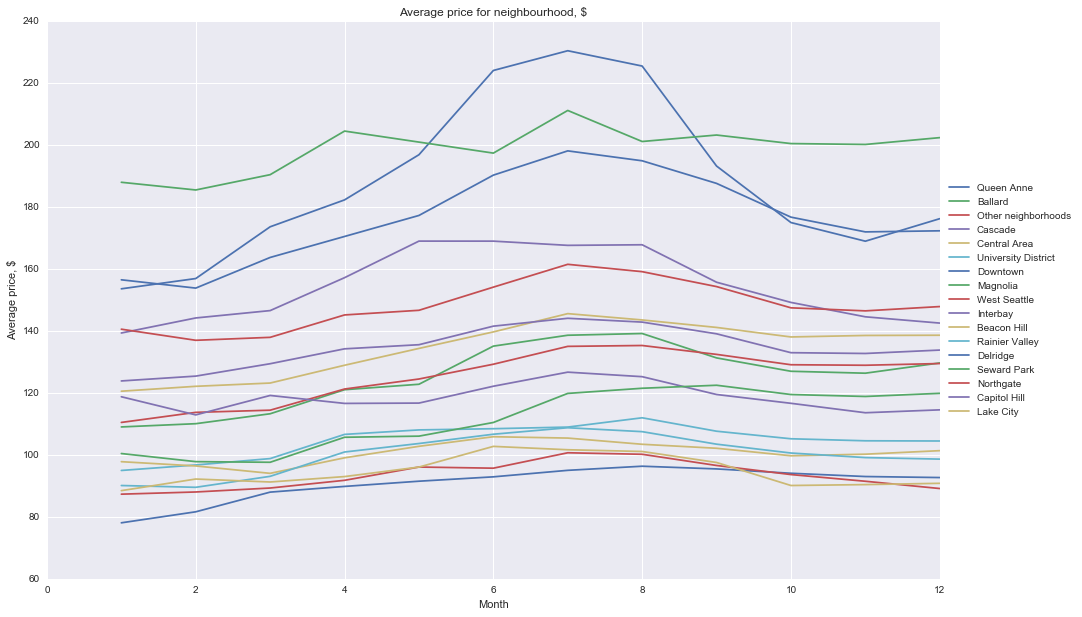

In [180]:

#plot prices for each neighbourhood
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)

for neighbourhood in neighbourhoods:
    ax.plot(price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['month'],
             price_by_month_neighbourhood[price_by_month_neighbourhood['neighbourhood_group_cleansed'] == neighbourhood]['price'],
             label = neighbourhood)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price for neighbourhood, $')
plt.show()

In [312]:
neighbourhood_df = listings_df[['neighbourhood_cleansed','price','id']]
neighbourhood_df.head()

,neighbourhood_cleansed,price,id
0,West Queen Anne,85.0,241032
1,West Queen Anne,150.0,953595
2,West Queen Anne,975.0,3308979
3,West Queen Anne,100.0,7421966
4,West Queen Anne,450.0,278830


In [313]:
Feature_Frequency(neighbourhood_df,'neighbourhood_cleansed')

,neighbourhood_cleansed,Number_Of_Listings
9,Broadway,397
4,Belltown,234
79,Wallingford,167
21,Fremont,158
47,Minor,135
76,University District,122
74,Stevens,119
20,First Hill,108
12,Central Business District,103
38,Lower Queen Anne,94


In [314]:
Feature_Price(neighbourhood_df,'neighbourhood_cleansed')

,neighbourhood_cleansed,average_Price
73,Southeast Magnolia,231.705882
61,Portage Bay,227.857143
83,Westlake,194.470588
81,West Queen Anne,187.769231
48,Montlake,182.789474
6,Briarcliff,176.571429
75,Sunset Hill,176.055556
32,Industrial District,173.333333
1,Alki,171.619048
85,Windermere,169.900000


In [317]:
# Let's look at the differences between the words used in listings for Airbnb locations in different Boston neighborhoods
uniqueNeighborhoods = listings_df.neighbourhood_cleansed.unique().tolist()
uniqueNeighborhoods

['West Queen Anne',
 'Adams',
 'West Woodland',
 'East Queen Anne',
 'Wallingford',
 'North Queen Anne',
 'Green Lake',
 'Westlake',
 'Mann',
 'Madrona',
 'University District',
 'Harrison/Denny-Blaine',
 'Minor',
 'Leschi',
 'Atlantic',
 'Pike-Market',
 'Eastlake',
 'South Lake Union',
 'Lawton Park',
 'Briarcliff',
 'Belltown',
 'International District',
 'Central Business District',
 'First Hill',
 'Yesler Terrace',
 'Pioneer Square',
 'Gatewood',
 'Arbor Heights',
 'Alki',
 'North Admiral',
 'Crown Hill',
 'Fairmount Park',
 'Genesee',
 'Interbay',
 'Industrial District',
 'Mid-Beacon Hill',
 'South Beacon Hill',
 'Greenwood',
 'Holly Park',
 'Fauntleroy',
 'North Beacon Hill',
 'Mount Baker',
 'Brighton',
 'South Delridge',
 'View Ridge',
 'Dunlap',
 'Rainier Beach',
 'Columbia City',
 'Seward Park',
 'North Delridge',
 'Maple Leaf',
 'Ravenna',
 'Riverview',
 'Portage Bay',
 'Bryant',
 'Montlake',
 'Broadway',
 'Loyal Heights',
 'Victory Heights',
 'Matthews Beach',
 'Whittier He

In [318]:
#function to clean the data and compile a list of most common words
def cleanData(neighbrhood_name,descrip):
    p = re.sub('[^a-zA-Z]+',' ', descrip)
    cmn_words=['The','I','Boston','room']
    descrip_data=nltk.word_tokenize(p)
    filtered_data=[word.lower() for word in descrip_data if word not in cmn_words if word not in stopwords.words('english')] 
    wnl = nltk.WordNetLemmatizer() 
    counts=Counter([wnl.lemmatize(data) for data in filtered_data])
    commn_words=[]
    for w in counts.most_common(5):
        commn_words.append(w[0])
    return ' '.join(commn_words)

In [322]:
summ={}
for n in uniqueNeighborhoods:
    text=''
    for index,row in listings_df.iterrows():
        if row['neighbourhood_cleansed']==n:
            if (pd.notnull(row['description']) & pd.notnull(row['space']) & pd.notnull(row['neighborhood_overview'])):
                text =text+row['description']+row['space']+row['neighborhood_overview']
    summ[n]=text
final_df_neighbrhood=pd.DataFrame(columns=['neighborhood','top 5 words in description'])
for a in summ.items():
    top5words=cleanData(a[0],a[1])
    final_df_neighbrhood=final_df_neighbrhood.append(pd.Series([a[0],top5words],index=['neighborhood','top 5 words in description']),ignore_index=True)

final_df_neighbrhood.head()

,neighborhood,top 5 words in description
0,West Queen Anne,queen seattle anne home neighborhood
1,Adams,ballard bedroom seattle restaurant kitchen
2,West Woodland,ballard seattle neighborhood home downtown
3,East Queen Anne,queen seattle anne space bedroom
4,Wallingford,seattle house wallingford bedroom lake


### street

In [232]:
street_df = listings_df[['street','price']]
street_df.head()

,street,price
0,"Gilman Dr W, Seattle, WA 98119, United States",85.0
1,"7th Avenue West, Seattle, WA 98119, United States",150.0
2,"West Lee Street, Seattle, WA 98119, United States",975.0
3,"8th Avenue West, Seattle, WA 98119, United States",100.0
4,"14th Ave W, Seattle, WA 98119, United States",450.0


### space

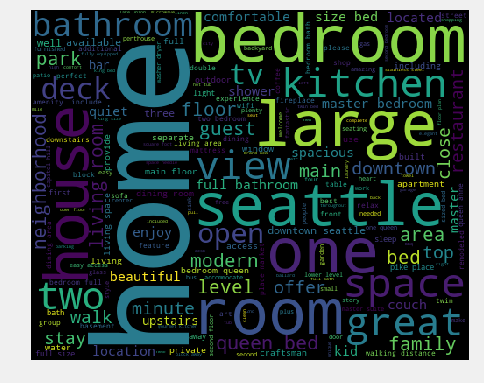

In [233]:
space_df = listings_df[['space','price']]
space_df.head(20)

space_df = space_df[pd.notnull(space_df['space'])]
space_df = space_df[space_df['space']!=0]
space_df = space_df.sort_values('price',ascending=[0])
top100_df = space_df.head(100)
final_words = Text_Processing2(top100_df,'space')
Wordcloud_Visualization(final_words)

### summary

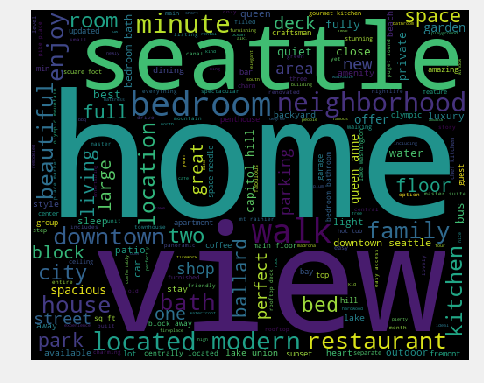

In [234]:
# summary: Analyzing and plotting word cloud for summary
summary_df = listings_df[['summary','price']]
summary_df = summary_df[pd.notnull(summary_df['summary'])]
summary_df = summary_df[summary_df['summary']!=0]
summary_df = summary_df.sort_values('price',ascending=[0])
top100_df = summary_df.head(100)
final_words = Text_Processing2(top100_df,'summary')
Wordcloud_Visualization(final_words)


# Datetime features

### host_response_time

In [235]:
host_response_time_df = listings_df[['host_response_time','price','id']]
host_response_time_df.head(10)

,host_response_time,price,id
0,within a few hours,85.0,241032
1,within an hour,150.0,953595
2,within a few hours,975.0,3308979
3,NaN,100.0,7421966
4,within an hour,450.0,278830
5,NaN,120.0,5956968
6,within an hour,80.0,1909058
7,within an hour,60.0,856550
8,NaN,90.0,4948745
9,within an hour,150.0,2493658


In [236]:
Feature_Frequency(host_response_time_df,'host_response_time')

TypeError: Feature_Frequency() missing 1 required positional argument: 'name'

In [286]:
Feature_Price(host_response_time_df,'host_response_time')

,host_response_time,average_Price
2,within a few hours,133.824380
1,within a day,132.819095
0,a few days or more,129.157895
3,within an hour,116.358747


### host_since

In [237]:
# convert host_since date into number and fill in missing values, drop the original column
listings_df['host_since'] = pd.to_datetime(listings_df['host_since'])
listings_df['host_since'] = listings_df['host_since'].apply(lambda x:x.to_pydatetime())
listings_df['host_since_year'] = listings_df['host_since'].apply(lambda x:x.year)
listings_df['host_since_year'].fillna(listings_df['host_since_year'].mean(), inplace = True)
listings_df['host_since_year'] = listings_df['host_since_year'].astype(int)

In [238]:
listings_df['host_since_month'] = listings_df['host_since'].apply(lambda x:x.month)
listings_df['host_since_month'].fillna(listings_df['host_since_month'].mean(), inplace = True)
listings_df['host_since_month'] = listings_df['host_since_month'].astype(int)

listings_df['host_since_day'] = listings_df['host_since'].apply(lambda x:x.day)
listings_df['host_since_day'].fillna(listings_df['host_since_day'].mean(), inplace = True)
listings_df['host_since_day'] = listings_df['host_since_day'].astype(int)

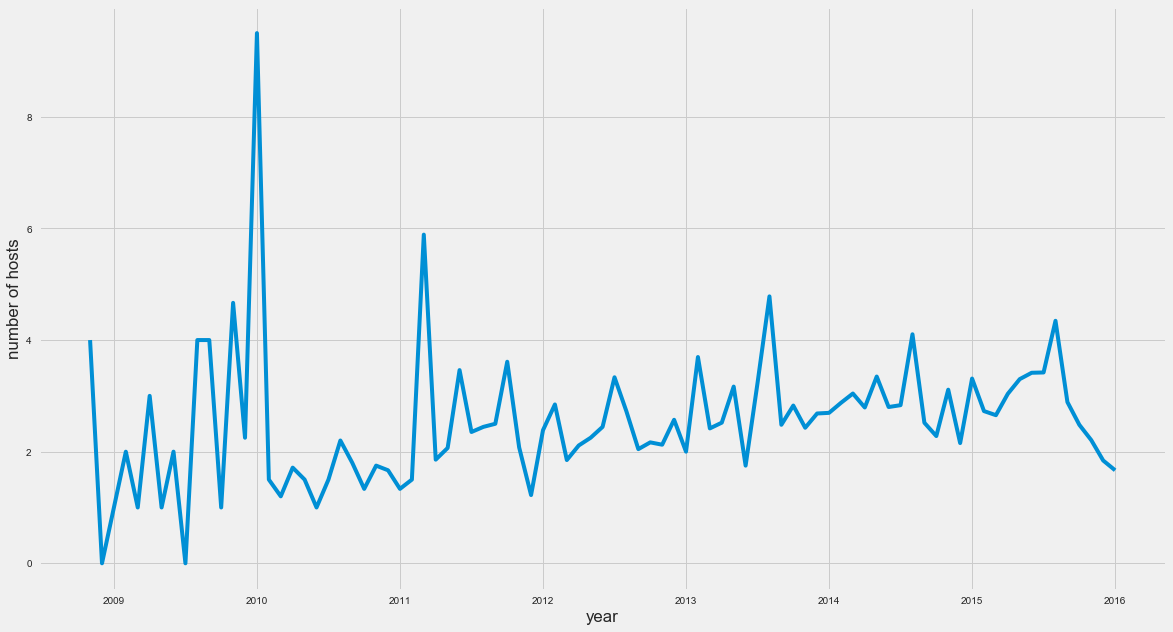

In [239]:
# this graph shows count of host registered everyday by resampling the data for each day
join_dates = pd.to_datetime(listings_df['host_since']).value_counts().resample('M').mean().fillna(0)
plt.figure(figsize=(18,10))
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')
plt.show()

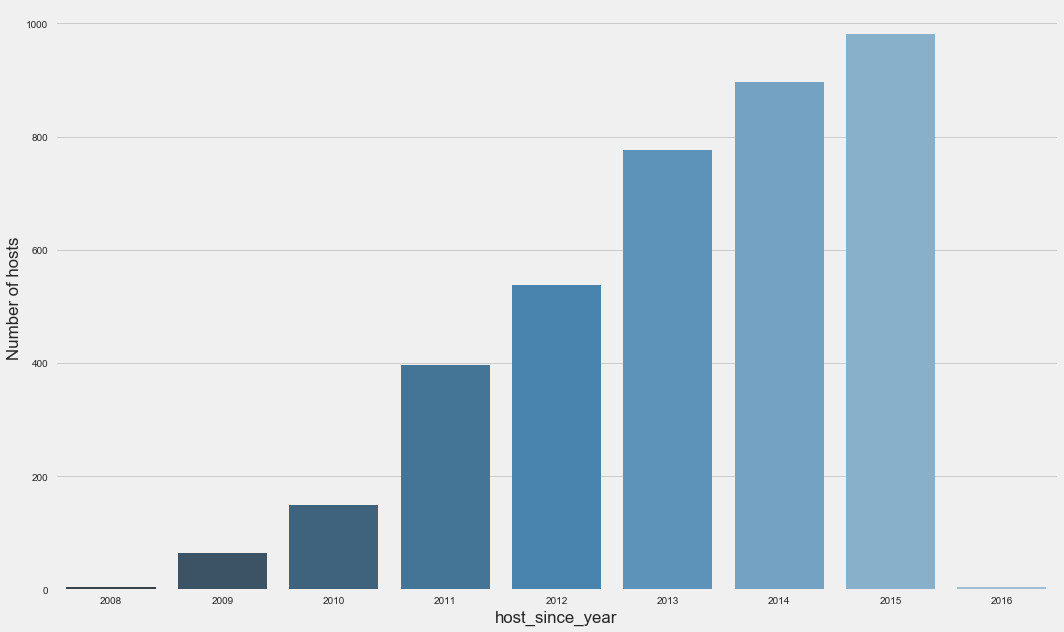

In [240]:
plt.figure(figsize=(16,10))
year_df = listings_df.groupby(['host_since_year']).id.count()
year_df = year_df.reset_index()
year_df = year_df.rename(columns={'id':'Number of hosts'})
ax = sns.barplot(x='host_since_year', y="Number of hosts", data=year_df,palette="Blues_d")
plt.ylabel('Number of hosts')
plt.show()

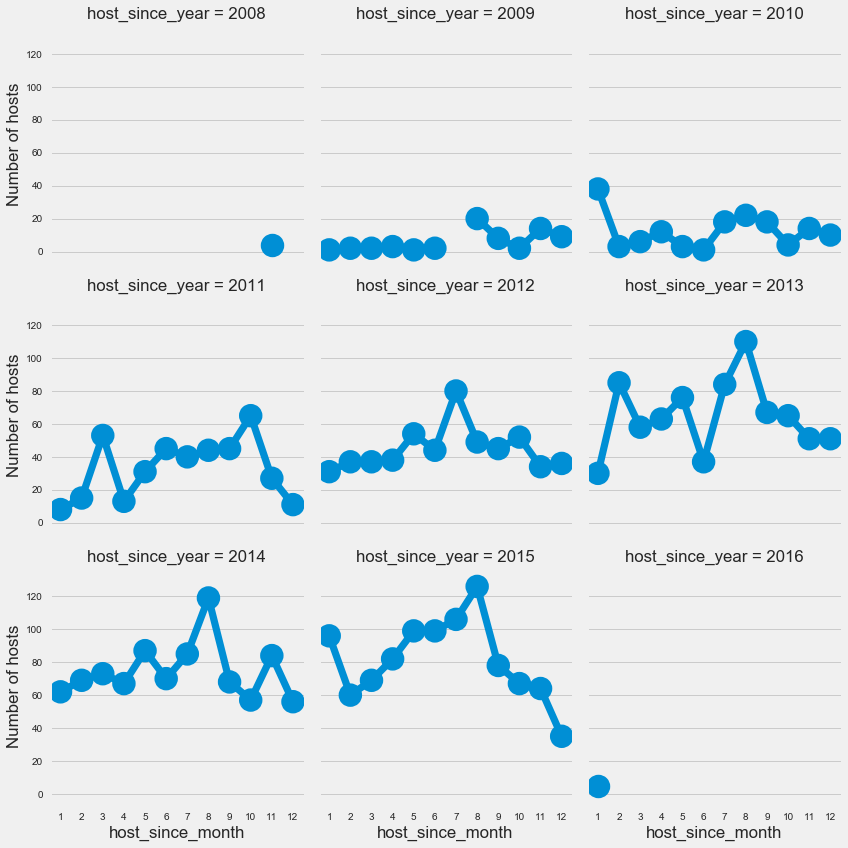

In [241]:
#plotting for all months for each year
yearMonth=listings_df.groupby(['host_since_year','host_since_month']).id.count()
yearMonth=yearMonth.reset_index()
yearMonth=yearMonth.sort_values(['host_since_year','host_since_month'],ascending=[1,1])
yearMonth=yearMonth.rename(columns={"id":"Number of hosts"})
sns.factorplot(data=yearMonth, x="host_since_month", y="Number of hosts",col="host_since_year",col_wrap=3)
plt.show()

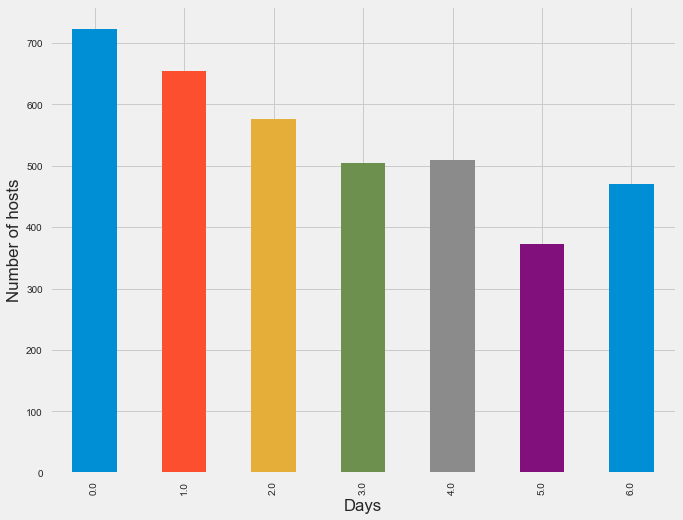

In [242]:
plt.figure(figsize=(10,8))
pd.to_datetime(listings_df['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")
plt.show()